# Описание проекта
В данном проекте планируется провести класстеризацию выбранного набора данных, определить смысл полученных групп, сделать выводы по результатам класстеризации.

# Описание набора данных

Набор данных представляет собой данные о качестве красного вина. Он включает 1599 образцов вина и 12 признаков, которые могут влиять на его качество:

1.  fixed acidity: фиксированная кислотность
2.  volatile acidity: летучая кислотность
3.  citric acid: лимонная кислота
4.  residual sugar: остаточный сахар
5.  chlorides: хлориды
6.  free sulfur dioxide: свободный диоксид серы
7.  total sulfur dioxide: общий диоксид серы
8.  density: плотность
9.  pH: уровень pH
10. sulphates: сульфаты
11. alcohol: содержание алкоголя
12. quality: оценка качества вина (целевой признак)

# Загрузка и предварительная обработка данных

Импортируем библиотеки и загрузим данные в датафрейм

Данные были получены с сайта: https://archive.ics.uci.edu/dataset/186/wine+quality

В описании набора данных было указано, что он не содержит пропущенных значений.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

# Загрузка данных
data = pd.read_csv('winequality-red.csv', delimiter=';')

# Вывод первых нескольких строк данных
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Посмотрим на некоторые статиски датафрейма

In [21]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Посмотрим на типы данных и убедимся, что все подходит

In [22]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Найдем аномальные значения и удалим их. Для поиска посмотрим на boxplot.

<Axes: >

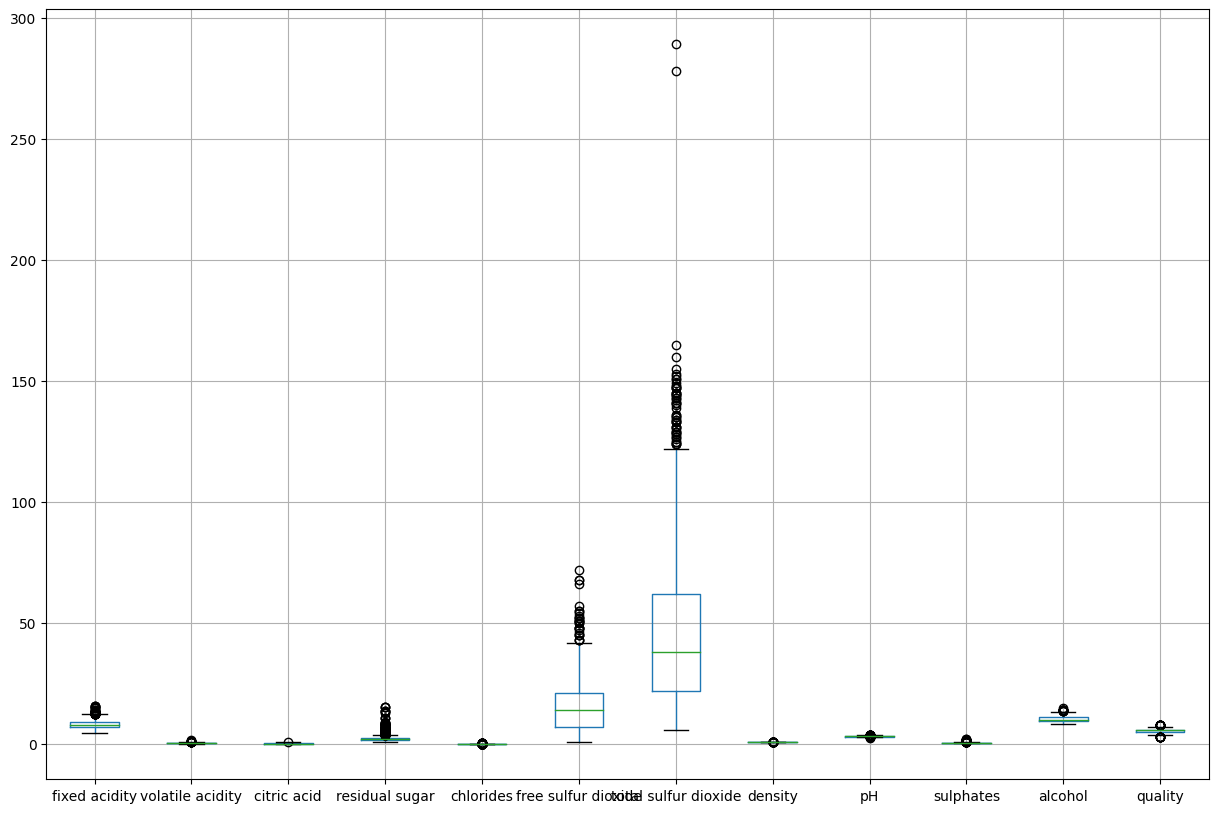

In [23]:
data.boxplot(figsize=(15,10))

Аномальные значения присутствуют в колонке total sulfur dioxide, удалим их

<Axes: >

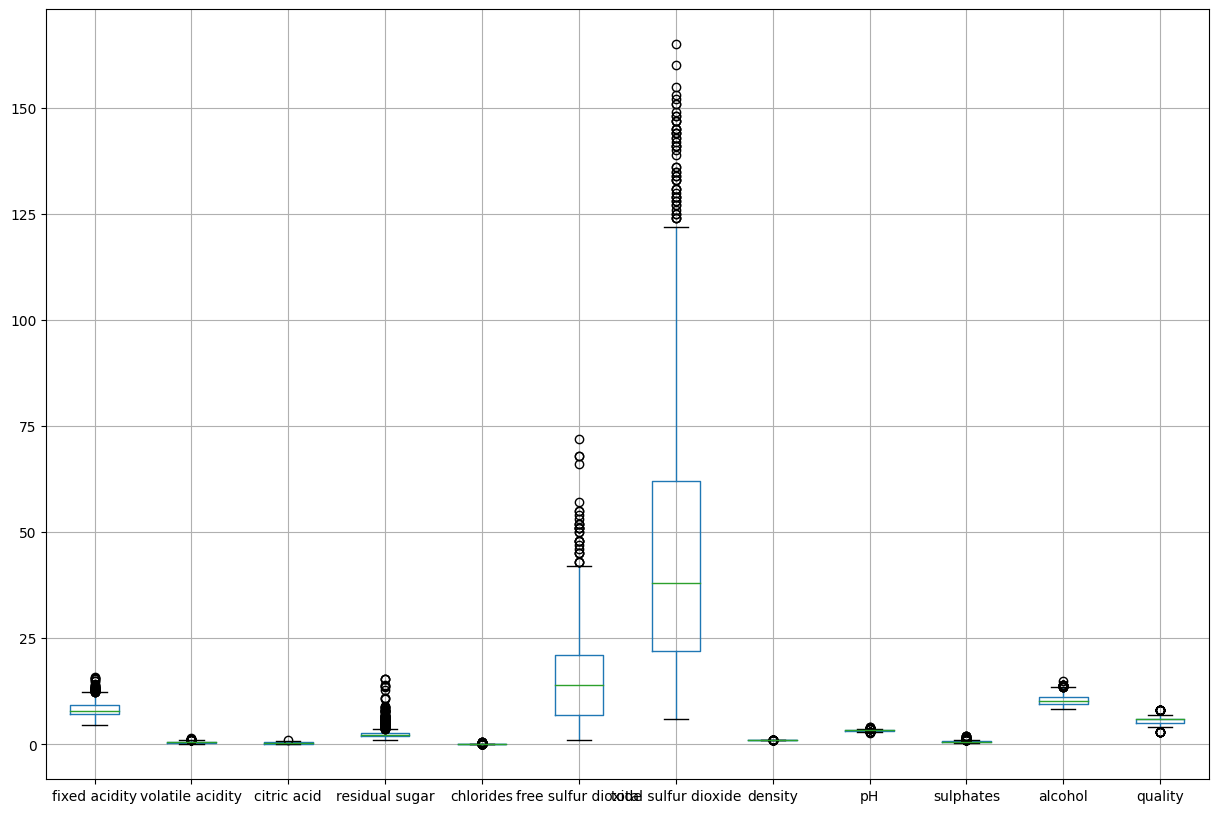

In [3]:
clean_df = data[data['total sulfur dioxide'] < 200]
clean_df.boxplot(figsize=(15,10))

Теперь данные обработаны, можно переходить к следующим этапам

# Постановка задачи и построение модели



Моя задача - выяснить, могут ли предложенные данные быть разбиты каким-то образом на группы (кластеризованы), и, в случае утвердительного ответа, определить смысл полученных групп и их влияние на качество.

Для начала создадим матрицу корреляции и посмотрим, какие параметры больше других кореллируют с качеством вина.

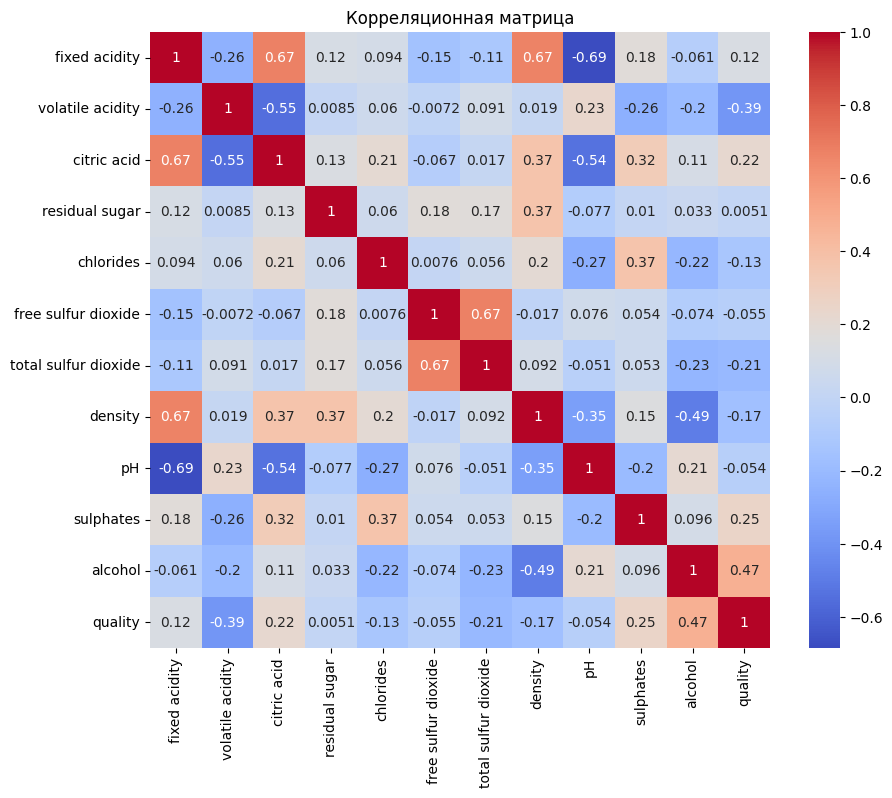

In [4]:
final_df = clean_df.copy()

# Описательная статистика
final_df.describe()

# Корреляционная матрица
plt.figure(figsize=(10, 8))
sns.heatmap(final_df.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

Поскольку самым интересным для меня параметром является quality (качество), анализ по большей части будет строится вокруг него. По этой матрице мы видим, что с качеством больше всего коррелирует содержание алкоголя (alcohol) и летучая кислотность (volatile acidity).

### Кластерный анализ

Кластеризация помогает выявить группы схожих образцов вина на основе их физических и химических свойств. Основным будет метод K-средних для определения оптимального количества кластеров и проведения кластеризации. Так же рассмотрим вариант с tSNE для уменьшения размерности и DBSCAN для задачи кластеризации.

### Начнем с метода K-средних:

Significant features based on correlation with quality: Index(['volatile acidity', 'citric acid', 'sulphates', 'alcohol', 'quality'], dtype='object')


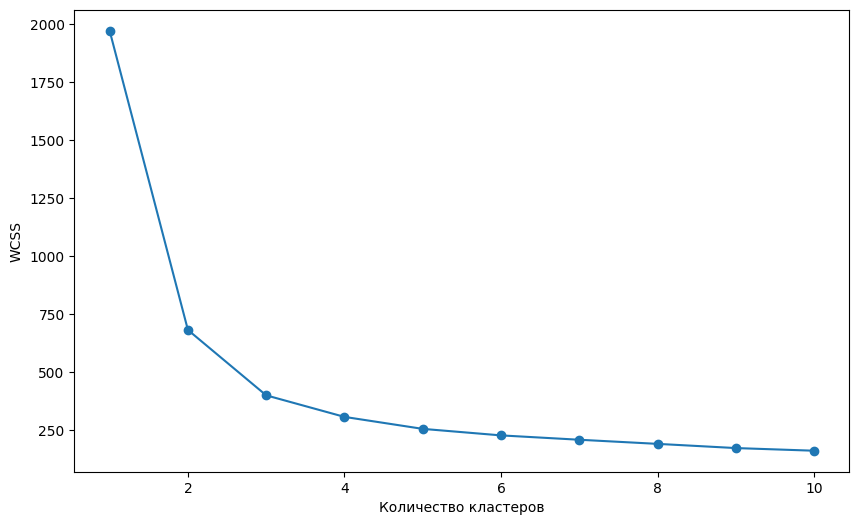

In [5]:
from sklearn.decomposition import PCA

# Корреляционная матрица
corr_matrix = data.corr()

# Отбор значимых признаков (корреляция выше 0.2 или ниже -0.2)
significant_features = corr_matrix['quality'][(corr_matrix['quality'] > 0.2) | (corr_matrix['quality'] < -0.2)].index
print("Significant features based on correlation with quality:", significant_features)

# Подготовка данных с выбранными признаками
X = data[significant_features].drop('quality', axis=1)

# Определение оптимального количества кластеров с использованием метода локтя
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.show()

На этом этапе хорошо видно, что разумно рассматривать от 4 до 6 кластеров.

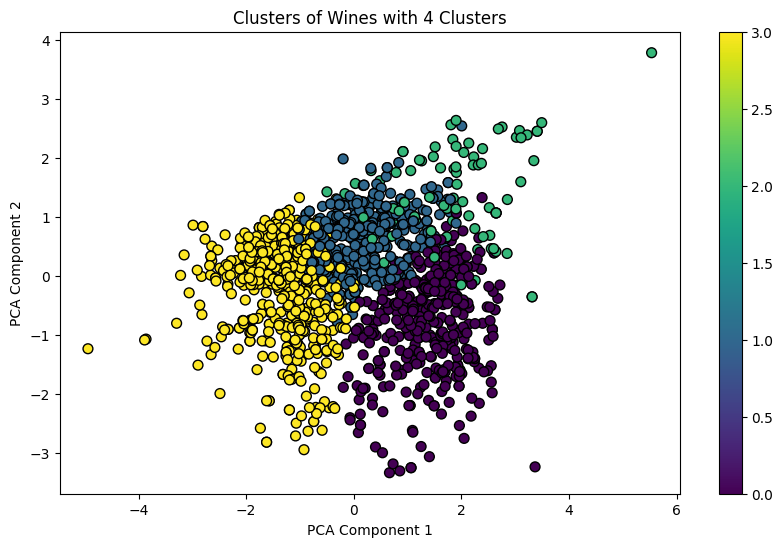


Cluster Analysis for 4 Clusters:
           fixed acidity  volatile acidity  citric acid  residual sugar  \
cluster_4                                                                 
0               8.954167          0.386030     0.421597        2.765972   
1               8.758785          0.465293     0.341931        2.521475   
2               9.076087          0.457446     0.423261        2.341304   
3               7.430130          0.685073     0.088909        2.421580   

           chlorides  free sulfur dioxide  total sulfur dioxide   density  \
cluster_4                                                                   
0           0.077419            14.883102             39.798611  0.996184   
1           0.086306            16.637744             54.247289  0.997578   
2           0.170348            16.532609             57.880435  0.997704   
3           0.082989            15.901466             43.609121  0.996375   

                 pH  sulphates    alcohol   quality 

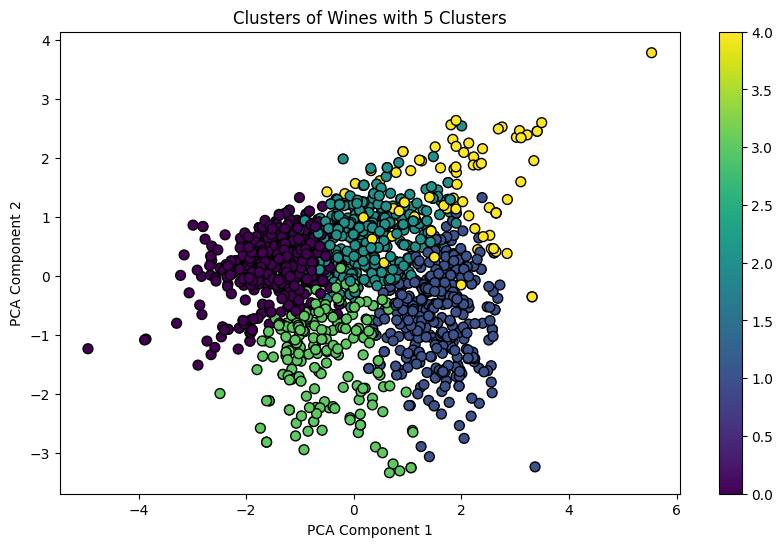


Cluster Analysis for 5 Clusters:
           fixed acidity  volatile acidity  citric acid  residual sugar  \
cluster_5                                                                 
0               7.685493          0.688114     0.115919        2.432882   
1               9.355914          0.367137     0.461720        2.764516   
2               8.856716          0.444017     0.361891        2.596766   
3               6.843498          0.600919     0.090314        2.367040   
4               8.974118          0.460647     0.423294        2.371765   

           chlorides  free sulfur dioxide  total sulfur dioxide   density  \
cluster_5                                                                   
0           0.085130            15.498066             48.471954  0.996842   
1           0.079624            14.409946             36.564516  0.996465   
2           0.087311            16.952736             53.457711  0.997688   
3           0.072215            17.242152             4

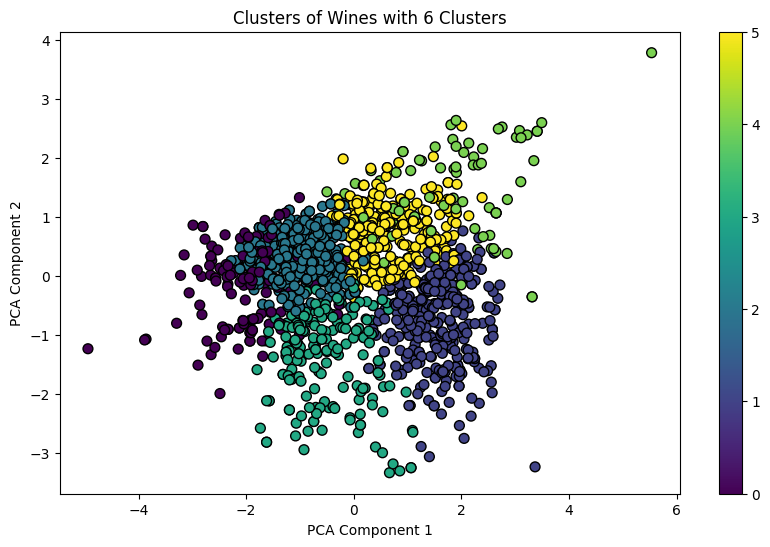


Cluster Analysis for 6 Clusters:
           fixed acidity  volatile acidity  citric acid  residual sugar  \
cluster_6                                                                 
0               7.833775          0.873311     0.124768        2.695364   
1               9.285251          0.368687     0.457345        2.751622   
2               7.673171          0.590254     0.139126        2.345325   
3               6.803883          0.593301     0.086262        2.374272   
4               8.909877          0.466728     0.418272        2.355556   
5               9.315152          0.414242     0.422152        2.684697   

           chlorides  free sulfur dioxide  total sulfur dioxide   density  \
cluster_6                                                                   
0           0.087093            15.321192             46.006623  0.996843   
1           0.080021            14.340708             35.870206  0.996297   
2           0.084104            15.871951             50.

In [6]:
# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применение PCA для уменьшения размерности (опционально, для визуализации)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Функция для кластеризации и визуализации
def perform_clustering(n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=100, max_iter=10000)
    clusters = kmeans.fit_predict(X_scaled)

    # Визуализация кластеров
    plt.figure(figsize=(10, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
    plt.title(f'Clusters of Wines with {n_clusters} Clusters')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar()
    plt.show()

    # Добавление кластеров в данные
    data[f'cluster_{n_clusters}'] = clusters

    # Анализ кластеров
    cluster_analysis = data.groupby(f'cluster_{n_clusters}').mean()
    print(f'\nCluster Analysis for {n_clusters} Clusters:')
    print(cluster_analysis[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                            'pH', 'sulphates', 'alcohol', 'quality']])

# Применение кластеризации и визуализации для 4, 5 и 6 кластеров
for n_clusters in range(4, 7):
    perform_clustering(n_clusters)


### Теперь рассмотрим кластеризацию с помощью DBSCAN:

In [7]:
# Уменьшение размерности с использованием t-SNE
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Применение DBSCAN кластеризации
dbscan = DBSCAN(eps=0.3, min_samples=6)
clusters = dbscan.fit_predict(X_tsne)

# Добавление результатов кластеризации к данным
data['tsne-1'] = X_tsne[:, 0]
data['tsne-2'] = X_tsne[:, 1]
data['tsne-3'] = X_tsne[:, 2]
data['dbscan_cluster'] = clusters

# Визуализация результатов DBSCAN с использованием 3D scatter plot
fig = px.scatter_3d(data, x='tsne-1', y='tsne-2', z='tsne-3', color='dbscan_cluster',
                    color_discrete_sequence=px.colors.qualitative.Bold, opacity=0.5)
fig.update_traces(marker_size=4)
fig.update_layout(title_text="DBSCAN Clustering with t-SNE", title_x=0.5)
fig.show()

# Оценка модели и результатов

## Алгоритм DBSCAN:

                fixed acidity  volatile acidity  citric acid  residual sugar  \
dbscan_cluster                                                                 
-1                   8.309353          0.528892     0.270377        2.539579   
 0                  11.050000          0.243333     0.430000        2.333333   

                chlorides  free sulfur dioxide  total sulfur dioxide  \
dbscan_cluster                                                         
-1               0.087507            15.897677             46.549906   
 0               0.076833             9.833333             24.666667   

                 density        pH  sulphates    alcohol   quality  cluster_4  \
dbscan_cluster                                                                  
-1              0.996740  3.311726   0.657552  10.427150  5.633396   1.557439   
 0              0.998483  3.148333   0.816667   9.316667  6.333333   1.000000   

                cluster_5  cluster_6    tsne-1    tsne-2    tsne-

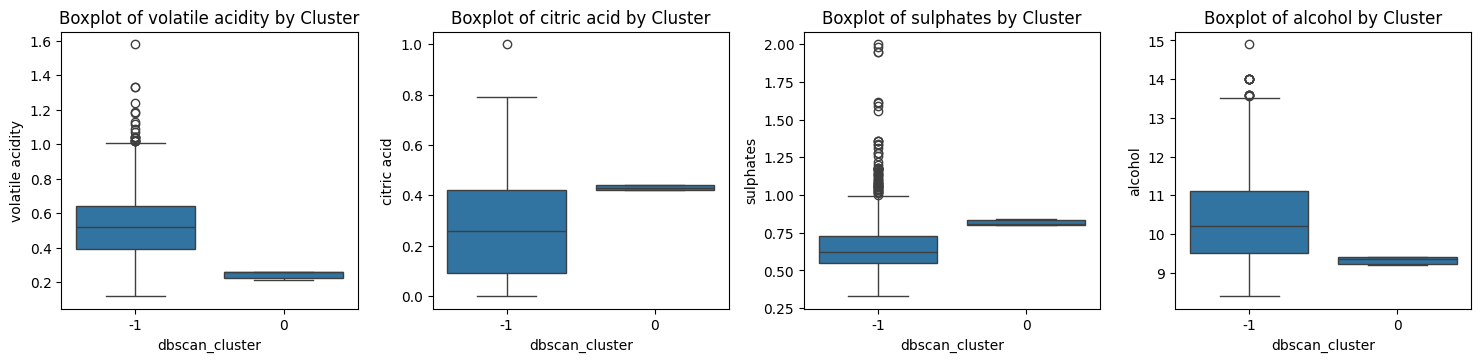

In [8]:
# Анализ кластеров
cluster_analysis = data.groupby('dbscan_cluster').mean()
print(cluster_analysis)

# Создание боксплотов для каждого признака по кластерам
plt.figure(figsize=(15, 10))
for i, column in enumerate(X.columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x='dbscan_cluster', y=column, data=data)
    plt.title(f'Boxplot of {column} by Cluster')
plt.tight_layout()
plt.show()


Кластер -1 (шумовые точки):

  - Основная масса данных была отмечена как шумовые точки, что может указывать на отсутствие четко выраженных плотных областей в пространстве признаков.
  - Эти точки имеют средние значения по всем признакам и умеренное качество вина (5.63).

Кластер 0:

  - Небольшое количество данных, что указывает на плотную область в пространстве признаков.
  - Вина в этом кластере имеют более высокое качество (6.33), низкое содержание летучей кислотности и высокий уровень фиксированной кислотности.
  - Этот кластер также показал высокий уровень содержания серы и высокую плотность.

В итоге, результаты кластеризации методом DBSCAN не помогли нам в выполнении задачи разумной кластеризации данных. Полученные кластеры не дают полноценной информации о распределении данных. Поэтому рассмотрим результаты метода K-средних.

## Метод K-средних:

Для анализа, давайте рассмотрим различия между кластерами и попробуем интерпретировать полученные данные. Будем фокусироваться на нескольких ключевых характеристиках: volatile acidity, PH, sulphates, alcohol и, самое главное, quality.

### Кластеры для 4 кластеров:

*    Cluster 0: Высокий уровень алкоголя (11.59), высокое содержание серы (0.71), низкий уровень кислотности (3.29), высокое качество (6.25).
*    Cluster 1: Высокий уровень летучей кислотности (0.67), низкий уровень серы (0.61), умеренное качество (5.43).
*    Cluster 2: Высокий уровень серы (1.12), низкий уровень алкоголя (9.86), умеренное качество (5.53).
*    Cluster 3: Высокий уровень летучей кислотности (0.54), низкий уровень алкоголя (10.24), низкое качество (5.38).

### Кластеры для 5 кластеров:

*    Cluster 0: среднее содержание серы (0.57), низкий уровень кислотности (3.34), низкое качество (5.24).
*    Cluster 1: Высокий уровень алкоголя (11.51), низкое содержание серы (0.72), средний уровень кислотности (3.25), высокое качество (6.27).
*    Cluster 2: Высокий уровень алкоголя (9.71), среднее содержание серы (0.62), низкий уровень кислотности (3.27), умеренное качество (5.45).
*    Cluster 3: высокий уровень алкоголя (11.59), низкий уровень кислотности (3.46), среднее качество (5.87).
*    Cluster 4: высокое содержание серы (1.13), низкий уровень кислотности (3.16), умеренное качество (5.55).

### Кластеры для 6 кластеров:

*    Cluster 0: Высокий уровень летучей кислотности (0.87), низкий уровень кислотности (3.37), низкое качество (5.02).
*    Cluster 1: Высокий уровень алкоголя (11.62), среднее содержание серы (0.713), высокое качество (6.32).
*    Cluster 2: Низкий уровень серы (0.59), низкий уровень алкоголя (9.71), умеренное качество (5.36).
*    Cluster 3: Низкий уровень летучей кислотности (0.59), высокий уровень алкоголя (11.64), среднее качество (5.92).
*    Cluster 4: Умеренный уровень алкоголя (9.84), высокое содержание серы (1.146), умеренное качество (5.53).
*    Cluster 5: Низкий уровень летучей кислотности (0.41), низкий уровень алкоголя (9.76), умеренное качество (5.48).


### Посмотрим на визуализацию боксплотов по полученным кластерам:

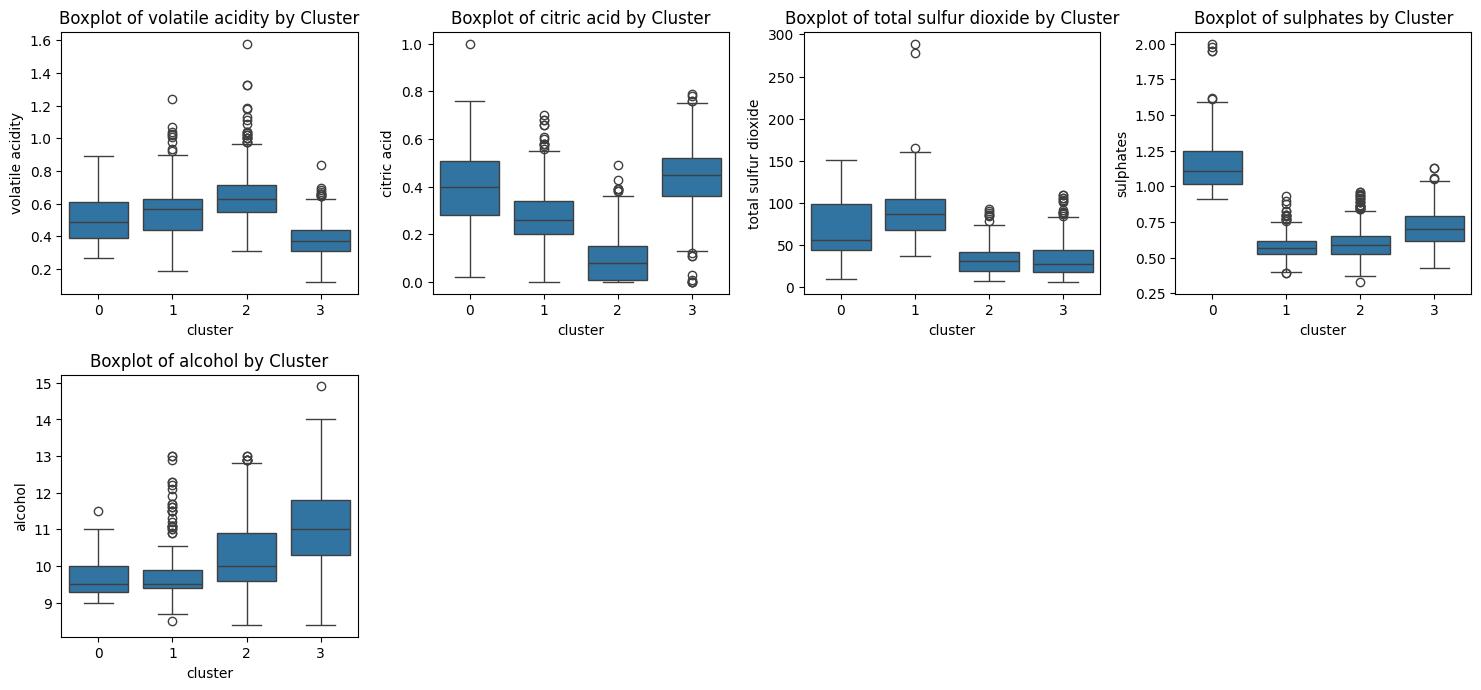

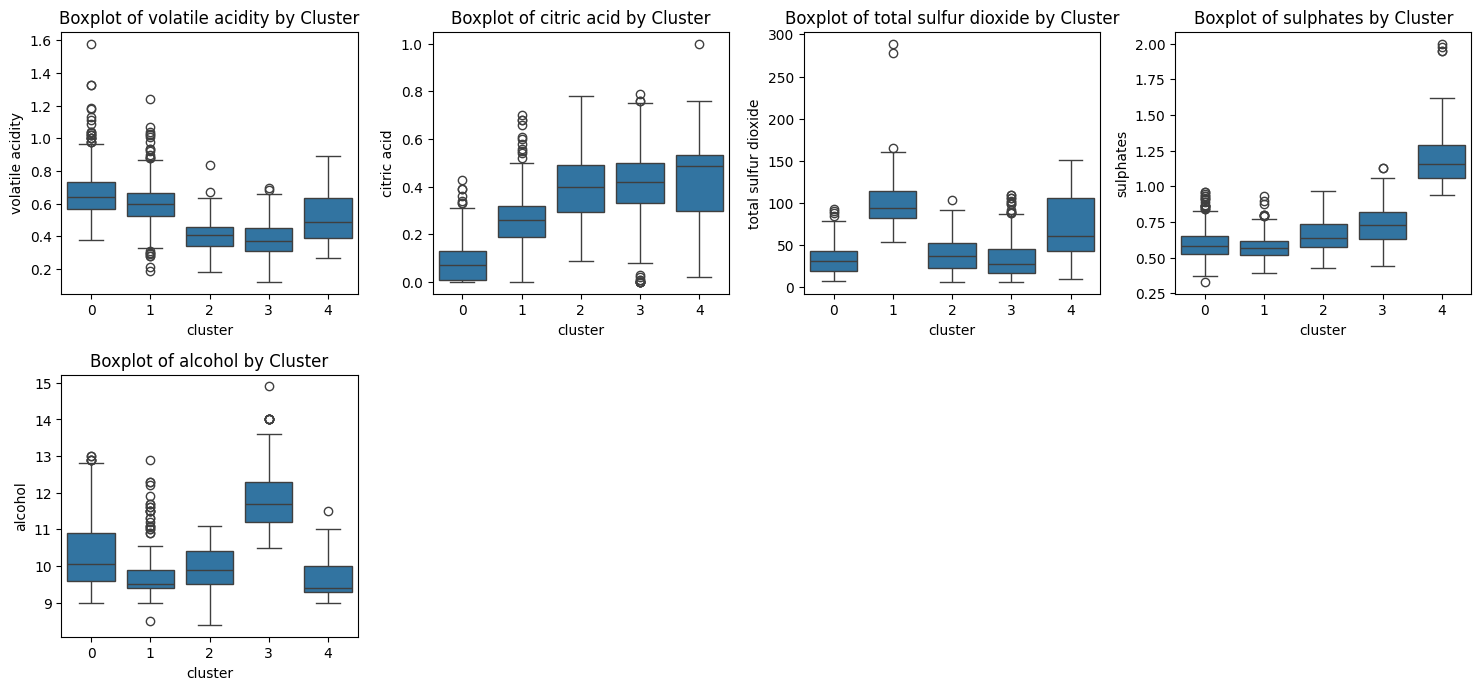

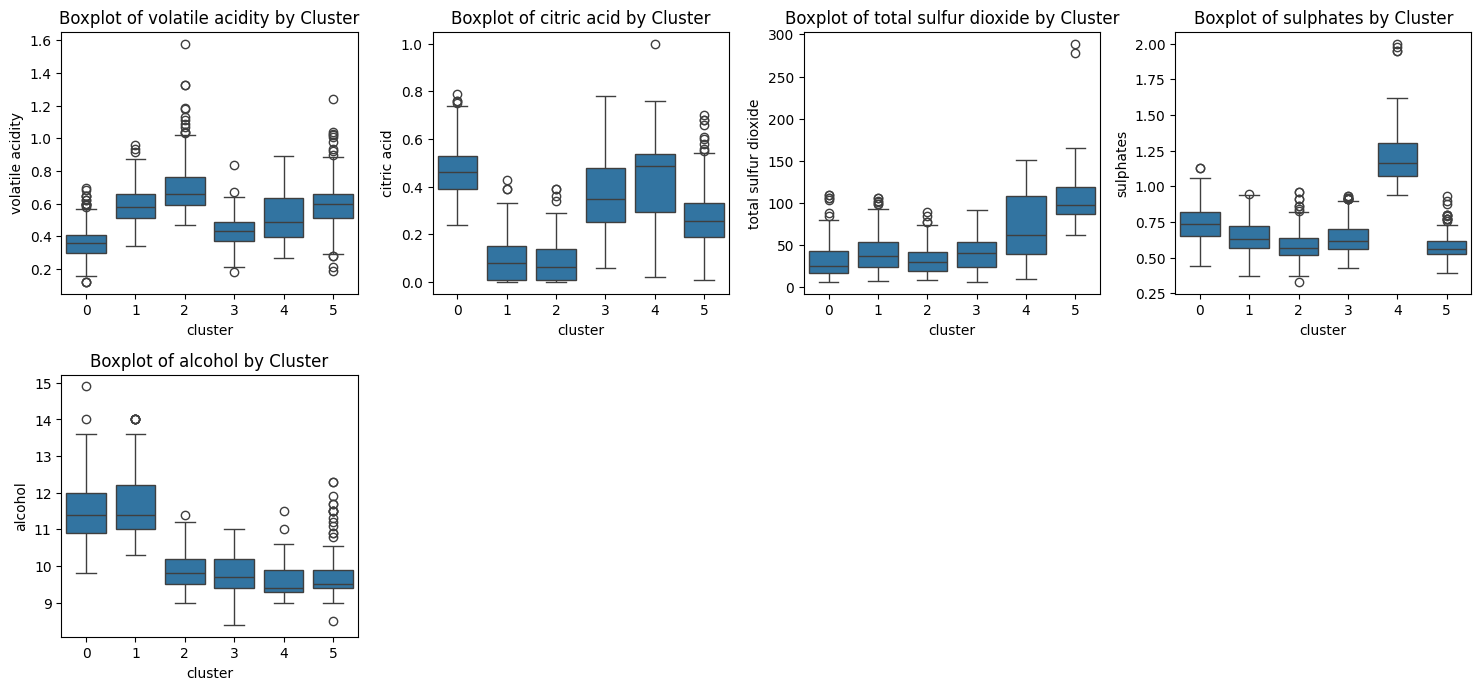

In [ ]:
# Визуализация боксплотов для 4, 5 и 6 кластеров
for n_clusters in range(4, 7):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_scaled)

    # Добавление кластеров в датафрейм
    data['cluster'] = clusters

    # Создание боксплотов для каждого признака по кластерам
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(X.columns, 1):
        plt.subplot(3, 4, i)
        sns.boxplot(x='cluster', y=column, data=data)
        plt.title(f'Boxplot of {column} by Cluster')
    plt.tight_layout()
    plt.show()

### Итак, сделаем итоговые выводы по полученным кластерам метода K-средних:

4 Кластера:
* Простая интерпретация.
* Четкое различие между кластерами на основе качества и алкоголя.

5 Кластеров:
* Немного более сложная структура.
* Один кластер выделяется высоким уровнем алкоголя и высоким качеством.
* Другие кластеры имеют различные комбинации уровней летучей кислотности и серы.

6 Кластеров:
* Самая сложная структура.
* Два кластера выделяются высоким уровнем алкоголя и хорошим качеством.
* Другие кластеры демонстрируют более специфические комбинации уровней кислотности и серы.

## Заключение

Выбор кластеров зависит от целей анализа:
* Если для решения задачи требуется простое и понятное разделение, то 4 кластера будут наилучшим вариантом.
* Если требуется более детальная и специфическая информация, лучше использовать 6 кластеров.